In [1]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import glob
import os.path
%matplotlib inline

In [2]:
fiberassign_root = "/global/cscratch1/sd/forero/DR5FiberAssign/fiberassign/tileresults"
fiberassign_tilefiles = glob.glob(fiberassign_root+"/tile*.fits")
print(len(fiberassign_tilefiles))

10667


In [3]:
output_root = "/global/cscratch1/sd/forero/gfa_test/"
gfa_files = glob.glob(os.path.join(output_root, "gfa_targets_*.fits"))
print(len(gfa_files))

67


In [4]:
gfa_tile_id = {}
for gfa_file in gfa_files:
    f = gfa_file.split('/')[-1]
    fileid = f.split("_")[-1]
    fileid = fileid[0:5]
    gfa_tile_id[fileid] = gfa_file

In [5]:
fa_tile_id = {}
for fa_file in fiberassign_tilefiles:
    f = fa_file.split('/')[-1]
    fileid = f.split("_")[-1]
    fileid = fileid[0:5]
    fa_tile_id[fileid] = fa_file

In [7]:
for gfa_id in gfa_tile_id.keys():
    if gfa_id in fa_tile_id.keys():
        print(gfa_id)
        #print(gfa_id, fa_tile_id[gfa_id], gfa_tile_id[gfa_id])

00284
00290
00100
00032
00139
00106
00104
00065
00034
00029
00015
00013
00288
00119
00016
00287
00289
00026
00007
00035
00047
00063
00043
00048
00046
00052
00028
00120
00027
00300
00049
00044
00025
00006
00098
00061
00115
00045
00291
00096
00066
00125
00285
00010
00051
00286
00017
00062
00050
00033
00009
00031
00036
00136
00014
00030
00053
00012
00011
00141
00008
00064
00118


1469


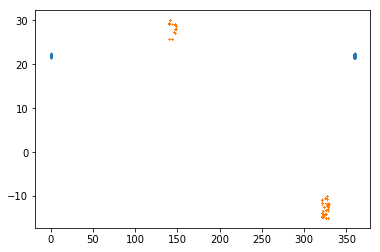

In [52]:
gfa_id = '00118'
gfa_data = fitsio.read(gfa_tile_id[gfa_id])
fiber_data = fitsio.read(fa_tile_id[gfa_id], ext=1)
potential_data = fitsio.read(fa_tile_id[gfa_id], ext=2)
ii = fiber_data['TARGETID']!=-1
print(len(potential_data))
plt.scatter(fiber_data['RA'][ii], fiber_data['DEC'][ii], s =0.1)
plt.scatter(gfa_data['RA'], gfa_data['DEC'], s =0.1)